# Dataset 1: Cleaning 

In [2]:
import pandas as pd
import numpy as np
from pprint import pprint

Source: Eurostat, dataset [road_eqr_carpda](http://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=road_eqr_carpda&lang=en)

In [3]:
df_orig = pd.read_csv("data/road_eqr_carpda_1_Data.csv", encoding="ISO-8859-1",na_values=[":"])
df = df_orig.copy()
print(df.head())
print(df.tail())
print(df.columns)

   TIME      GEO    UNIT                          MOT_NRG    Value  \
0  2013  Belgium  Number               Petroleum products  169,665   
1  2013  Belgium  Number  Liquefied petroleum gases (LPG)      NaN   
2  2013  Belgium  Number                           Diesel  319,863   
3  2013  Belgium  Number                      Natural Gas      109   
4  2013  Belgium  Number                      Electricity      501   

  Flag and Footnotes  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
      TIME     GEO    UNIT                   MOT_NRG Value Flag and Footnotes
2375  2017  Turkey  Number  Hydrogen and fuel cells      0                NaN
2376  2017  Turkey  Number                Bioethanol     0                NaN
2377  2017  Turkey  Number                 Biodiesel     0                NaN
2378  2017  Turkey  Number                   Bi-fuel     0                NaN
2379  2017  Turkey  Number                     Othe

## Column: Flag and Footnotes

In [4]:
print(df["Flag and Footnotes"].unique())
df[df["Flag and Footnotes"] == 'd']

[nan 'd']


,TIME,GEO,UNIT,MOT_NRG,Value,Flag and Footnotes
7,2013,Belgium,Number,Hybrid electric-petrol,"4,920",d
10,2013,Belgium,Number,Hybrid diesel-electric,912,d
58,2013,Estonia,Number,Hybrid electric-petrol,191,d
61,2013,Estonia,Number,Hybrid diesel-electric,4,d
136,2013,Italy,Number,Petroleum products,"419,045",d
138,2013,Italy,Number,Diesel,"707,641",d
142,2013,Italy,Number,Petrol (excluding hybrids),"419,045",d
153,2013,Cyprus,Number,Petroleum products,"11,758",d
155,2013,Cyprus,Number,Diesel,"2,998",d
204,2013,Hungary,Number,Petroleum products,"52,677",d


In [5]:
# 'd' means "definition differs"
# Assume for simplicity that it is the same

df = df.drop("Flag and Footnotes",axis=1)

## Column: UNIT 

In [6]:
df.UNIT.unique()

array(['Number'], dtype=object)

In [7]:
df = df.drop("UNIT",axis=1)

## Change column names 

In [8]:
df.columns = ["time","country","motor","value"]
df.head()

,time,country,motor,value
0,2013,Belgium,Petroleum products,"169,665"
1,2013,Belgium,Liquefied petroleum gases (LPG),NaN
2,2013,Belgium,Diesel,"319,863"
3,2013,Belgium,Natural Gas,109
4,2013,Belgium,Electricity,501


## Column: country 

In [9]:
df.country.unique()

array(['Belgium', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Spain', 'France', 'Croatia', 'Italy', 'Cyprus',
       'Latvia', 'Lithuania', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Finland',
       'Sweden', 'United Kingdom', 'Liechtenstein', 'Norway',
       'Switzerland', 'North Macedonia', 'Turkey'], dtype=object)

In [10]:
df.country.replace(to_replace='Germany (until 1990 former territory of the FRG)', value='Germany', inplace=True)
df.country.unique()

array(['Belgium', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Spain',
       'France', 'Croatia', 'Italy', 'Cyprus', 'Latvia', 'Lithuania',
       'Hungary', 'Malta', 'Netherlands', 'Austria', 'Poland', 'Portugal',
       'Romania', 'Slovenia', 'Finland', 'Sweden', 'United Kingdom',
       'Liechtenstein', 'Norway', 'Switzerland', 'North Macedonia',
       'Turkey'], dtype=object)

## Column: value 

In [11]:
df[[pd.isnull(x) for x in df.value]]

,time,country,motor,value
1,2013,Belgium,Liquefied petroleum gases (LPG),NaN
8,2013,Belgium,Plug-in hybrid petrol-electric,NaN
11,2013,Belgium,Plug-in hybrid diesel-electric,NaN
12,2013,Belgium,Hydrogen and fuel cells,NaN
13,2013,Belgium,Bioethanol,NaN
14,2013,Belgium,Biodiesel,NaN
15,2013,Belgium,Bi-fuel,NaN
18,2013,Denmark,Liquefied petroleum gases (LPG),NaN
20,2013,Denmark,Natural Gas,NaN
21,2013,Denmark,Electricity,NaN


In [12]:
df.fillna(0,inplace=True)

In [13]:
df.dtypes

time        int64
country    object
motor      object
value      object
dtype: object

In [14]:
def remove_comma(x):
    return str(x).replace(',','')
df.value = df.value.apply(remove_comma).astype(int)

In [15]:
df.dtypes

time        int64
country    object
motor      object
value       int64
dtype: object

## Column: motor type 

In [16]:
df['motor'].unique()

array(['Petroleum products', 'Liquefied petroleum gases (LPG)', 'Diesel',
       'Natural Gas', 'Electricity', 'Alternative Energy',
       'Petrol (excluding hybrids) \xa0', 'Hybrid electric-petrol',
       'Plug-in hybrid petrol-electric \xa0',
       'Diesel (excluding hybrids) \xa0', 'Hybrid diesel-electric',
       'Plug-in hybrid diesel-electric \xa0',
       'Hydrogen and fuel cells\xa0', 'Bioethanol', 'Biodiesel',
       'Bi-fuel', 'Other'], dtype=object)

In [17]:
# Will also remove \xa0 etc.
df.motor = df.motor.str.strip()

df.motor.unique()

array(['Petroleum products', 'Liquefied petroleum gases (LPG)', 'Diesel',
       'Natural Gas', 'Electricity', 'Alternative Energy',
       'Petrol (excluding hybrids)', 'Hybrid electric-petrol',
       'Plug-in hybrid petrol-electric', 'Diesel (excluding hybrids)',
       'Hybrid diesel-electric', 'Plug-in hybrid diesel-electric',
       'Hydrogen and fuel cells', 'Bioethanol', 'Biodiesel', 'Bi-fuel',
       'Other'], dtype=object)

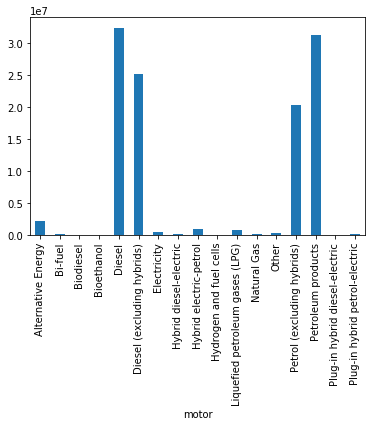

In [19]:
mot_num = df[['motor','value']].groupby('motor').sum().loc[:,'value'].squeeze()
mot_num.plot.bar()

### Sanity test

In [20]:
print(mot_num['Diesel'])
print(mot_num['Diesel (excluding hybrids)'] + mot_num['Hybrid diesel-electric'] + mot_num['Plug-in hybrid diesel-electric'])

32433533
25249092


The data is inconsistent. 

In [21]:
print(df[df.motor == 'Diesel (excluding hybrids)'])

      time          country                       motor    value
9     2013          Belgium  Diesel (excluding hybrids)   318951
26    2013          Denmark  Diesel (excluding hybrids)        0
43    2013          Germany  Diesel (excluding hybrids)        0
60    2013          Estonia  Diesel (excluding hybrids)     7341
77    2013          Ireland  Diesel (excluding hybrids)        0
94    2013            Spain  Diesel (excluding hybrids)        0
111   2013           France  Diesel (excluding hybrids)  1168194
128   2013          Croatia  Diesel (excluding hybrids)        0
145   2013            Italy  Diesel (excluding hybrids)   707641
162   2013           Cyprus  Diesel (excluding hybrids)     2998
179   2013           Latvia  Diesel (excluding hybrids)        0
196   2013        Lithuania  Diesel (excluding hybrids)        0
213   2013          Hungary  Diesel (excluding hybrids)    72343
230   2013            Malta  Diesel (excluding hybrids)     5266
247   2013      Netherlan

In [22]:
df[(df.time==2017) & (df.country=='Germany')]

,time,country,motor,value
1938,2017,Germany,Petroleum products,1986488
1939,2017,Germany,Liquefied petroleum gases (LPG),4400
1940,2017,Germany,Diesel,1336776
1941,2017,Germany,Natural Gas,3723
1942,2017,Germany,Electricity,25056
1943,2017,Germany,Alternative Energy,143474
1944,2017,Germany,Petrol (excluding hybrids),0
1945,2017,Germany,Hybrid electric-petrol,0
1946,2017,Germany,Plug-in hybrid petrol-electric,0
1947,2017,Germany,Diesel (excluding hybrids),0


In [23]:
df.to_csv('data/road_eqr_carpda_pre.csv',header=True,index=False)

## Combine sparse classes in motor column

In [24]:
print(len(df.query('motor == "Diesel (excluding hybrids)" and value == 0')))
len(df.query('motor == "Diesel" and value==0'))

49


19

In [25]:
df2 = df.copy()

## Step 1

* Drop 'X (excluding hybrids)' (due to lack of data)
* Drop 'Alternative energy' (since it is merely the sum of 'electric' and 'other')

In [26]:
df2=df2[~df.motor.isin(['Diesel (excluding hybrids)','Petrol (excluding hybrids)','Alternative Energy'])]
df2.motor.unique()

array(['Petroleum products', 'Liquefied petroleum gases (LPG)', 'Diesel',
       'Natural Gas', 'Electricity', 'Hybrid electric-petrol',
       'Plug-in hybrid petrol-electric', 'Hybrid diesel-electric',
       'Plug-in hybrid diesel-electric', 'Hydrogen and fuel cells',
       'Bioethanol', 'Biodiesel', 'Bi-fuel', 'Other'], dtype=object)

## Step 2

* Keep 'Diesel', 'Petroleum products' and 'Electric'
* Combine all hybrids into one
* Combine all alternative energies into 'other'

In [27]:
df2.motor.replace('Petroleum products', 'petroleum', inplace=True)
df2.motor.replace('Diesel', 'diesel', inplace=True)
df2.motor.replace('Electricity', 'electricity', inplace=True)

df2.motor.replace(['Hybrid electric-petrol', 'Plug-in hybrid petrol-electric', 'Hybrid diesel-electric', 'Plug-in hybrid diesel-electric'], 'hybrid', inplace=True)
df2.motor.replace(['Liquefied petroleum gases (LPG)', 'Natural Gas', 'Hydrogen and fuel cells', 'Bioethanol', 'Biodiesel', 'Bi-fuel', 'Other'], 'other', inplace=True)

df2.motor.unique()

array(['petroleum', 'other', 'diesel', 'electricity', 'hybrid'],
      dtype=object)

In [28]:
df2.describe()

,time,value
count,1960.000000,1.960000e+03
mean,2015.000000,3.402595e+04
std,1.414574,1.636310e+05
min,2013.000000,0.000000e+00
25%,2014.000000,0.000000e+00
50%,2015.000000,0.000000e+00
75%,2016.000000,5.790000e+02
max,2017.000000,1.986488e+06


In [29]:
df2.head()

,time,country,motor,value
0,2013,Belgium,petroleum,169665
1,2013,Belgium,other,0
2,2013,Belgium,diesel,319863
3,2013,Belgium,other,109
4,2013,Belgium,electricity,501


In [33]:
df3 = pd.DataFrame(columns=df2.columns)
for (i,row) in df2.drop('value',axis=1).drop_duplicates().iterrows():
    partial = df2[(df2.time==row.time) & (df2.country==row.country) & (df2.motor==row.motor)]
    row['value'] = partial.value.sum()
    #print(row.motor, len(partial))
    df3 = df3.append(row)
df3.head()

,time,country,motor,value
0,2013,Belgium,petroleum,169665
1,2013,Belgium,other,340
2,2013,Belgium,diesel,319863
4,2013,Belgium,electricity,501
7,2013,Belgium,hybrid,5832


In [34]:
df3[df3.country.isin(['Netherlands','Belgium','Norway'])].head()

,time,country,motor,value
0,2013,Belgium,petroleum,169665
1,2013,Belgium,other,340
2,2013,Belgium,diesel,319863
4,2013,Belgium,electricity,501
7,2013,Belgium,hybrid,5832


## Find countries without data on electric cars

In [35]:
elec_by_country = df3[df3.motor=='electricity'].groupby('country').value.max()
elec_by_country[elec_by_country == 0]

country
Denmark            0
Italy              0
North Macedonia    0
Name: value, dtype: int64

**This dataset does not contain data on electric cars in Denmark and Italy!**

## Write end result 

In [36]:
df3.to_csv('data/road_eqr_carpda_cleaned.csv',index=False,header=True)